In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/model_agırlıkları.zip" -d "/content/"

Archive:  /content/gdrive/MyDrive/model_agırlıkları.zip
  inflating: /content/2/events.out.tfevents.1682770168.b5c62d1d5477.175.0  
  inflating: /content/2/events.out.tfevents.1682770783.b5c62d1d5477.175.1  
 extracting: /content/2/last_checkpoint  
  inflating: /content/2/metrics.json  
  inflating: /content/2/model_final.pth  


In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
#!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=3dbf2b53435189222fca69ad809741f4e9f0ae752234a500761bced086111085
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.9 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatibl

In [ ]:
#!zip -r /content/detectron2.zip /content/detectron2
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
#from google.colab import files
#files.download('/content/detectron2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
import cv2
from detectron2.utils.visualizer import Visualizer

# Configuration setup for testing
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("kb_tst", )


predictor = DefaultPredictor(cfg)
im = cv2.imread('/content/gdrive/MyDrive/me/3.jpg') # resmin ölçüleri en az 227 - 277 olmalı 
outputs = predictor(im)
print(outputs)

AssertionError: ignored

In [ ]:
from google.colab.patches import cv2_imshow

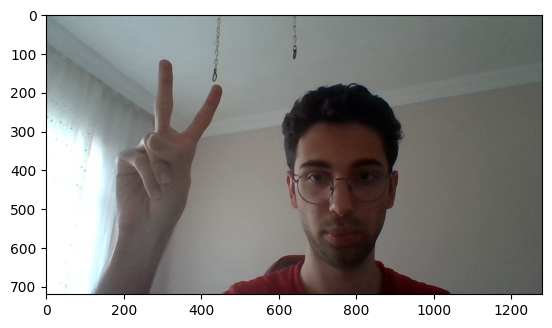

In [ ]:
from matplotlib import pyplot as plt
#plt.axis("off")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show() # Display the original image
print(im.shape)


In [ ]:
hand_index = outputs["instances"].scores.tolist().index(max(outputs["instances"].scores.tolist()))
hand_index

(720, 1280, 3)


0

In [ ]:
ymin = xmin = ymax = xmax = 0
output_pred_boxes = outputs["instances"].pred_boxes[hand_index]
for i in output_pred_boxes.__iter__():

  print(i.cpu().tolist())
  box_list = i.cpu().tolist()

    # %20 genişletecceğim

  horizontal_width = round(box_list[2]) - round(box_list[0])
  vertical_width = round(box_list[3]) - round(box_list[1])

    
  # böyle atamam sıkıntı ortasını bulup öyle genişletmeliyim

  xmin = round((((box_list[2] - box_list[0]) / 2) + box_list[0]) - (((horizontal_width / 2) *0.5 )+(horizontal_width / 2)))
  xmax = round((((box_list[2] - box_list[0]) / 2) + box_list[0]) + (((horizontal_width / 2) *0.5 )+(horizontal_width / 2)))
  ymin = round((((box_list[3] - box_list[1]) / 2) + box_list[1]) - (((vertical_width / 2) *0.5 )+ (vertical_width / 2)))
  ymax = round((((box_list[3] - box_list[1]) / 2) + box_list[1]) + (((vertical_width / 2) *0.5 )+(vertical_width / 2)))

'''
    xmin = round(box_list[0]) 
    ymin = round(box_list[1])
    xmax = round(box_list[2])
    ymax = round(box_list[3])
'''


[189.63259887695312, 278.84027099609375, 400.751953125, 521.2789916992188]


'\n    xmin = round(box_list[0]) \n    ymin = round(box_list[1])\n    xmax = round(box_list[2])\n    ymax = round(box_list[3])\n'

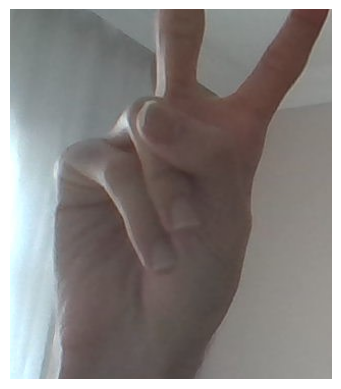

(363, 316, 3)


In [ ]:
cropped_image = im[ymin:ymax, xmin:xmax] # ymin, ymax, xmin, xmax
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show() # Display the original image
print(cropped_image.shape)

In [ ]:
#outputs["instances"].pred_classes

In [ ]:
#outputs["instances"].pred_boxes[0]

In [ ]:
#outputs["instances"].scores.tolist()

In [ ]:
#output_pred_boxes = outputs["instances"].pred_boxes[0]
#for i in output_pred_boxes.__iter__():
#    print(i.cpu().tolist())